# Detect Suits in Playing Cards
This notebook shows how to use an object detection model from LandingLens to detect suits on playing cards. A webcam is used to take photos of playing cards.

In [21]:
# Install dependencies only if needed to avoid unnecessary restarts
try:
  import landingai
except ImportError:
  import os
  from IPython.display import display, Markdown
  display(Markdown("##Installing modules. You will need to restart runtime."))
  %pip install landingai
  display(Markdown("##Stopping RUNTIME! Please restart runtime."))
  os.kill(os.getpid(), 9) # This is a way to force a restart

## Acquire an Image from Your Webcam

Saved to /var/folders/cv/kdkz6y_55z1blffx_f42w6zh0000gn/T/tmpozrbl98d/photo.jpg


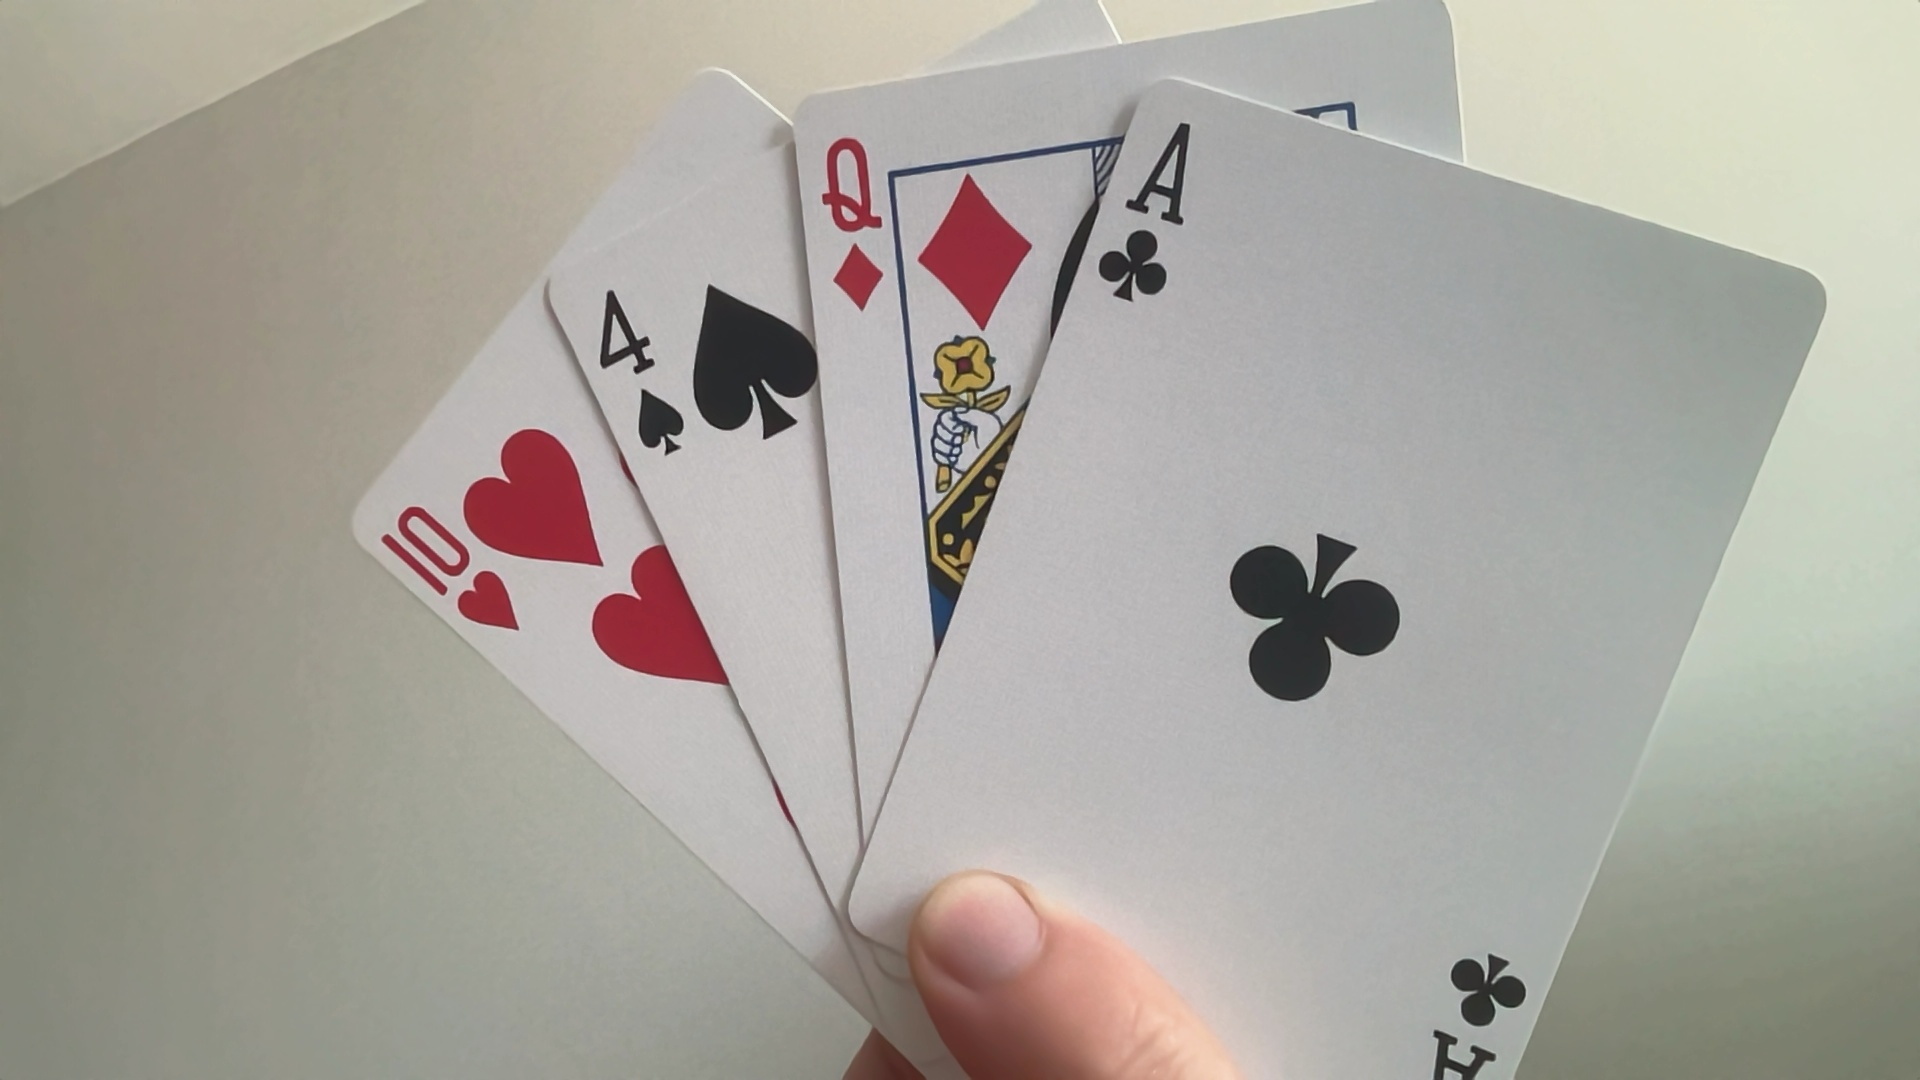

In [12]:
from landingai.image_source_ops import take_photo_from_webcam

try:
  frame = take_photo_from_webcam()
  # Show the image which was just taken.
  display(frame)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Run Inference Using the Object Detection Model

In [13]:
#@title Set the following variables as needed for your setup
# These keys correspond to a public LandingLens model
api_key         = "land_sk_aMemWbpd41yXnQ0tXvZMh59ISgRuKNRKjJEIUHnkiH32NBJAwf"  #@param {type:"string"}
model_endpoint  =  "0b3ad59c-80ca-481b-977f-f2470cbe83e3" #@param {type:"string"}


In [14]:
from landingai.predict import Predictor
from landingai.visualize import overlay_predictions
        
predictor = Predictor(model_endpoint, api_key=api_key)

# Run prediction and show raw results
results = predictor.predict(frame)
display(results)

[ObjectDetectionPrediction(score=0.994853138923645, label_name='Club', label_index=3, id='c011866a-7828-4dc8-8d4e-71f5413a4f2a', bboxes=(1096, 226, 1174, 308)),
 ObjectDetectionPrediction(score=0.9926153421401978, label_name='Heart', label_index=1, id='156fb2a5-9a1b-4c10-98b8-f03e1847e8c9', bboxes=(458, 421, 605, 570)),
 ObjectDetectionPrediction(score=0.9915071725845337, label_name='Club', label_index=3, id='ae786c25-67ef-406b-82a9-ddedfd3c4478', bboxes=(1449, 948, 1532, 1030)),
 ObjectDetectionPrediction(score=0.9914502501487732, label_name='Club', label_index=3, id='a8f9b096-3177-47a7-8133-63061c469281', bboxes=(1222, 527, 1411, 709)),
 ObjectDetectionPrediction(score=0.9902832508087158, label_name='Heart', label_index=1, id='a6a5e7ba-7c0c-4c86-855d-71c0954990e0', bboxes=(455, 567, 525, 636)),
 ObjectDetectionPrediction(score=0.9862639307975769, label_name='Diamond', label_index=2, id='e8ad18ed-f13a-436a-af14-69fc19dd4f55', bboxes=(914, 169, 1038, 339)),
 ObjectDetectionPrediction(s

## Visualize the Results

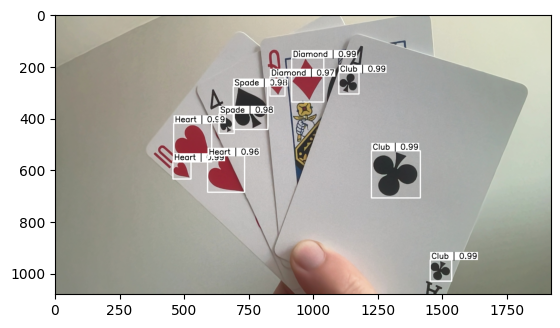

In [15]:
# Draw raw results on the original image
frame_with_preds = overlay_predictions(results, image=frame)

frame_with_preds

## Process the Results to Count the Number of Suits (Objects)

In [16]:
from IPython.display import display, Markdown
# Filter only high confidence detections and count them
filtered_results = [x for x in results if x.score  > 0.5] 
display(Markdown(f"# Found {len(filtered_results)} suits"))


# Found 10 suits